In [ ]:
import pandas as pd
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt

In [ ]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [3]:
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

In [4]:
job_counts = df.job_title_short.value_counts()

job_counts

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


In [ ]:
plt.bar(job_counts.index, job_counts)
plt.title("Posting by Job Title")
plt.xlabel('count of posting')
plt.ylabel("Count of Job Postings")
plt.xticks(rotation=45, ha="right")
plt.show

<BarContainer object of 10 artists>

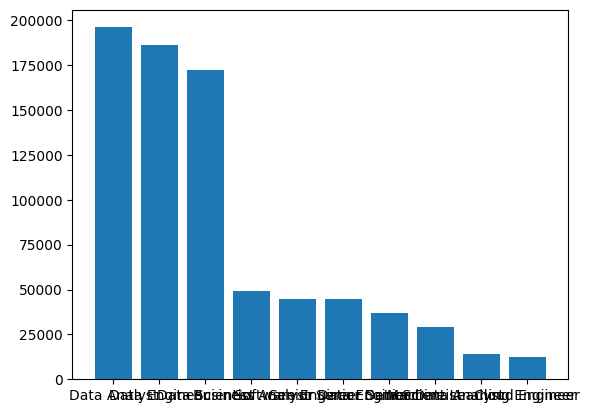

In [7]:
plt.bar(job_counts.index, job_counts.values)

<Axes: xlabel='job_title_short'>

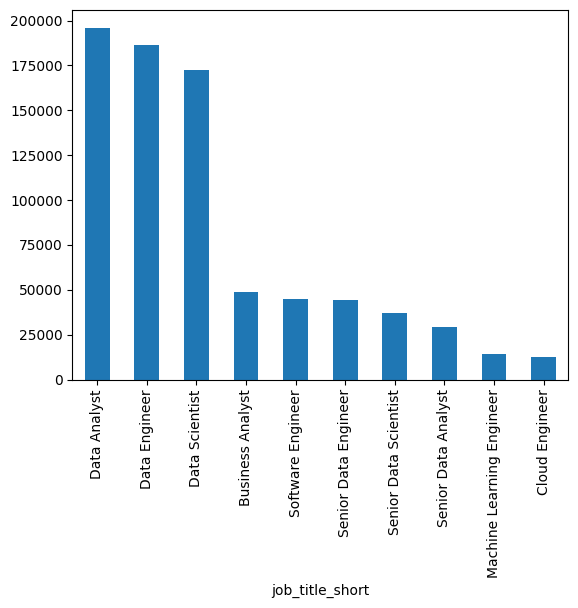

In [8]:
job_counts.plot(kind='bar')

In [9]:
df[['job_posted_date', 'salary_year_avg']].dropna(subset=['salary_year_avg'])

,job_posted_date,salary_year_avg
28,2023-08-01 13:37:57,109500.0
77,2023-06-26 14:22:54,140000.0
92,2023-02-21 13:29:59,120000.0
100,2023-07-31 13:01:18,228222.0
109,2023-10-12 13:02:19,89000.0
...,...,...
785624,2023-08-31 06:02:16,139216.0
785641,2023-01-04 16:36:07,150000.0
785648,2023-04-12 06:02:51,221875.0
785682,2023-03-04 06:16:08,157500.0


<Axes: xlabel='job_posted_date'>

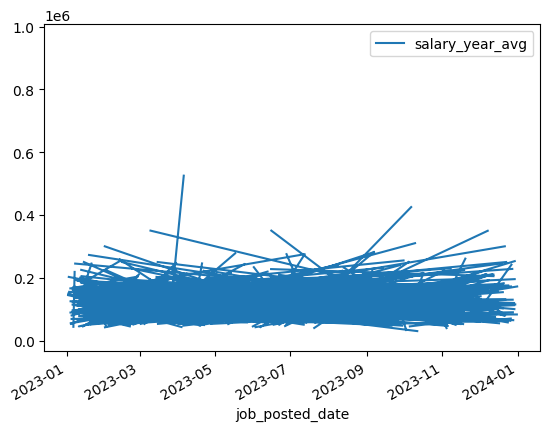

In [12]:
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')